<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/EnsembleLearning_BoostingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Learning

for a diverse set of models in comparison to single models. This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

##Boosting Technique 

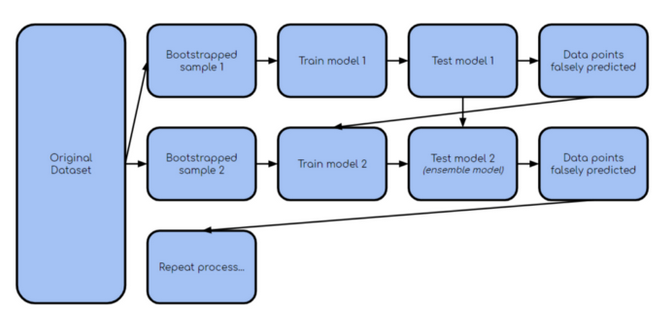

Boosting Techniques :

    1. Ada Boost
    2. Gradient Boost GBM
    3. Xtream Gradient Boost XGBM
    4. Light GBM
    5. Cat Boost

In [ ]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier

##Boosting with Ada boost :

Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

    1. Initially, all observations in the dataset are given equal weights.
    2. A model is built on a subset of data.
    3. Using this model, predictions are made on the whole dataset.
    4. Errors are calculated by comparing the predictions and actual values.
    5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
    6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
    7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

Parameters

    base_estimators:
        It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
    n_estimators:
        It defines the number of base estimators.
        The default value is 10, but you should keep a higher value to get better performance.
    learning_rate:
        This parameter controls the contribution of the estimators in the final combination.
        There is a trade-off between learning_rate and n_estimators.
    max_depth:
        Defines the maximum depth of the individual estimator.
        Tune this parameter for best performance.
    n_jobs
        Specifies the number of processors it is allowed to use.
        Set value to -1 for maximum processors allowed.
    random_state :
        An integer value to specify the random data split.
        A definite value of random_state will always produce same results if given with same parameters and training data.


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Ada Boost Classifier

model = AdaBoostClassifier(random_state=1)
model.fit(xtrain, ytrain)
model.score(xtest,ytest)
ypred=model.predict(xtest)

Accuracy is : 0.7792207792207793
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154



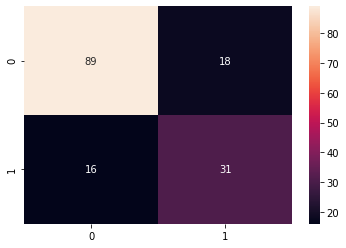

In [ ]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
#Ada Boost Regressor

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.2475203225902188

##Gradient Boosting GBM

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

Accuracy is : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



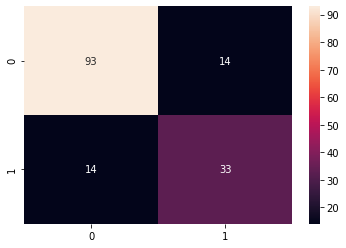

In [ ]:
#GBM Classifier

model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)
ypred=model.predict(xtest)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
#GBM Regressor

df2 = pd.read_csv('/content/housing.csv')
x=df2.drop(columns=["MEDV"])
y=df2["MEDV"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
model=GradientBoostingRegressor(n_estimators=100,learning_rate =0.1,criterion='mse',max_depth=3)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print("Accuracy Score :",r2_score(ytest,ypred))


Accuracy Score : 0.8076664142373544


##XGradient Boost 

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [ ]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#model
model=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8246753246753247
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



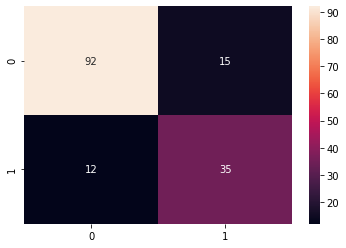

In [ ]:
print("Accuracy is:",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
# help(XGBClassifier)

#model
model=XGBClassifier()
#params
learning_rate=[0.05,0.1,0.10,0.15,0.20,0.25]
max_depth=[3,4,5,6,7,8]
min_child_weight=[1,2,3,4,5,6,7]
colsample_bytree=[0.3,0.4,0.5,0.7]
#param grid
grid={"learning_rate":learning_rate,"max_depth":max_depth,
      "min_child_weight":min_child_weight,"colsample_bytree":colsample_bytree}
kfold=RepeatedStratifiedKFold(n_splits=5)


In [ ]:
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.7538997734239637
{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 7}
